# Tutorial

## Monte Carlo Simulation

## for American Options

(c) 2017 Martin Guggisberg

## ToDo

1. [ X ] relevant literature
1. [   ] 1-dim Wiener process
1. [   ] n-dim Wiener process
1. [   ] Regression -> estimating density probability function
1. [   ] Regression: using different basis functions
1. [   ] standard SDE Discretization 
1. [   ] using different SDE discretizations
1. [   ] comparing results with experiments from literature
1. [   ] using simulated anealing for regression
1. [   ]

## Literature

### Articles
    - XX

### Books
- Hilpisch, Y. (2015). [Derivatives Analytics with Python: Data Analysis, Models, Simulation, Calibration and Hedging](http://dawp.tpq.io/). John Wiley & Sons.
- Hilpisch, Y. (2014). [Python for Finance: Analyze Big Financial Data](http://pff.tpq.io/). " O'Reilly Media, Inc.".

Black-Scholes-Merton(1973)

$$ S_T = S_0 \cdot e^{(r-\frac{1}{2}\cdot \sigma^2) \cdot T + \sigma \cdot \sqrt{T}\cdot z)} $$

In [36]:
# parameters
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [172]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
I = 100000

z = np.random.standard_normal(I)
ST = S0 * (exp(r-0.5*sigma**2)*T+sigma*sqrt(T)*z)
hT = maximum(ST - K,0)
C0 = exp(-r * T) * sum(hT) / I
print ("VAlue of the European Call Option %5.3f" % C0)

# show random numbers I
#hist, bins = np.histogram(z, bins=40)
#width = 0.65* (bins[1] - bins[0])
#center = (bins[:-1] + bins[1:]) / 2
#plt.bar(center, hist, align='center', width=width)


VAlue of the European Call Option 6.664


In [173]:
#
# Monte Carlo valuation of European call options with pure Python
# mcs_pure_python.py
#

from time import time
from math import exp, sqrt, log
from random import gauss, seed

seed(20000)
t0 = time()

# Parameters
S0 = 100.  # initial value
K = 105.  # strike price
T = 1.0  # maturity
r = 0.05  # riskless short rate
sigma = 0.2  # volatility
M = 50  # number of time steps
dt = T / M  # length of time interval
I = 250000  # number of paths

# Simulating I paths with M time steps
S = []
for i in range(I):
    path = []
    for t in range(M + 1):
        if t == 0:
            path.append(S0)
        else:
            z = gauss(0.0, 1.0)
            St = path[t - 1] * exp((r - 0.5 * sigma ** 2) * dt
                                  + sigma * sqrt(dt) * z)
            path.append(St)
    S.append(path)
    
# Calculating the Monte Carlo estimator
C0 = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I

# Results output
tpy = time() - t0
print("European Option Value %7.3f" % C0)
print("Duration in Seconds   %7.3f" % tpy)

European Option Value   7.999
Duration in Seconds    36.981


### 1-dim Wiener process

''

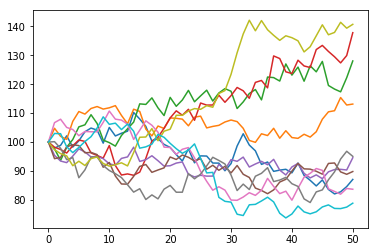

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    plt.plot(S[i])
""

### Vectorization


In [185]:
#
# Monte Carlo valuation of European call options with NumPy (log version)
# mcs_full_vector_numpy.py
#
import math
from numpy import *
from time import time
  # star import for shorter code

random.seed(20000)
t0 = time()

# Parameters
S0 = 100.; K = 105.; T = 1.0; r = 0.05; sigma = 0.2
M = 50; dt = T / M; I = 250000

# Simulating I paths with M time steps
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
            + sigma * math.sqrt(dt) 
                    * random.standard_normal((M + 1, I)), axis=0))
  # sum instead of cumsum would also do
  # if only the final values are of interest
S[0] = S0
    
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I

# Results output
tnp2 = time() - t0
print("European Option Value %7.3f" % C0)
print("Duration in Seconds   %7.3f" % tnp2)

European Option Value   8.166
Duration in Seconds     1.141


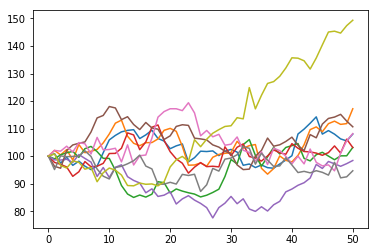

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(S[:, :9])

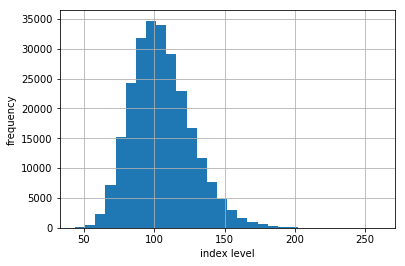

In [190]:
plt.hist(S[-1],bins=30)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')

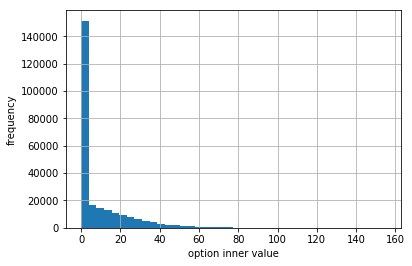

In [191]:
plt.hist(np.maximum(S[-1]-K,0),bins=40)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')

## Regression / Approximation


$$
min_{\alpha_1,\cdots,\alpha_D}  \frac{1}{I} \sum^{I}_{i=1} (y_i - \sum^{D}_{d=1} a_d \cdot b_d(x))^2
$$


In [192]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
def f(x):
    return np.sin(x) + 0.5 * x

In [194]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

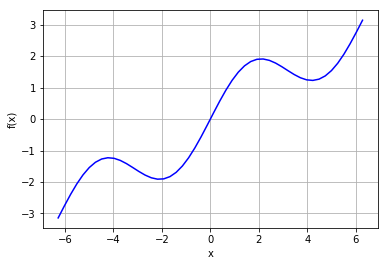

In [195]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')


In [197]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

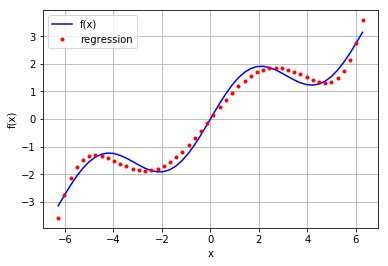

In [198]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

### Definition of basics functions

In [208]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [214]:
matrix[3, :] = np.sin(x)

In [209]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

In [210]:
reg

array([  9.26243218e-17,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

In [211]:
ry = np.dot(reg, matrix)

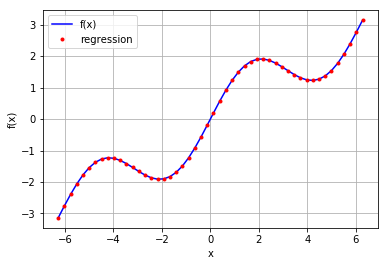

In [212]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [213]:
np.allclose(f(x), ry)

True

In [215]:
## Noise

xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))


In [216]:


reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)



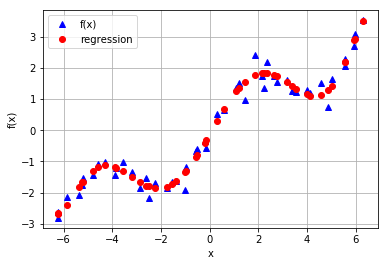

In [217]:

plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [218]:
np.allclose(yn, ry)

False


# Multiple Dimensions

In [219]:


def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2



In [221]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
  # generates 2-d grids out of the 1-d arrays
Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()
  # yields 1-d arrays from the 2-d grids

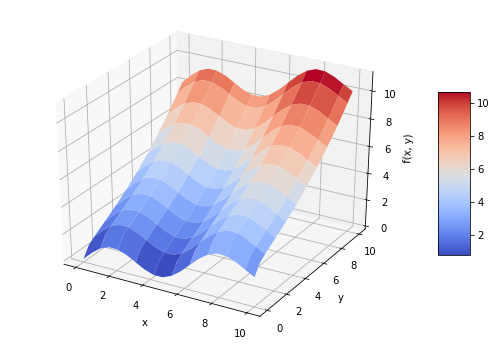

In [222]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [223]:


matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1



In [224]:
import statsmodels.api as sm

In [225]:
model = sm.OLS(fm((x, y)), matrix).fit()

In [226]:
model.rsquared



1.0

In [228]:
a = model.params
a

array([  2.30371278e-15,   2.50000000e-01,   1.72084569e-15,
        -1.75207071e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

In [229]:
def reg_func(a, p):
    x, y = p
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 +
            f2 + f1 + f0)

In [230]:
RZ = reg_func(a, (X, Y))

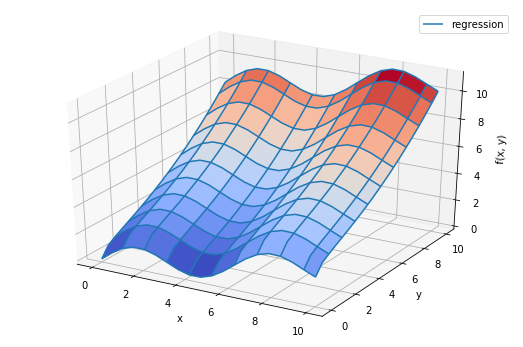

In [231]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

# Convex Optimization

In [232]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)


In [233]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

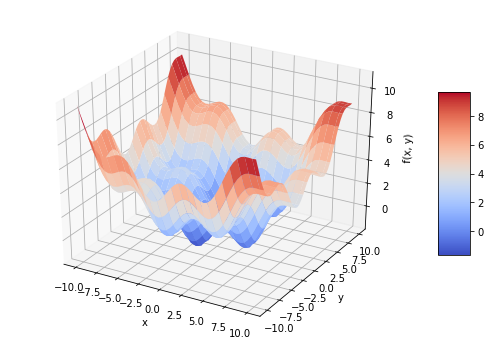

In [234]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [235]:
import scipy.optimize as spo

# Integration by Simulation

In [241]:
def f(x):
    return np.sin(x) + 0.5 * x

In [237]:
a = 0.5  # left integral limit
b = 9.5  # right integral limit
x = np.linspace(0, 10)
y = f(x)

In [239]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print(np.sum(f(x)) / len(x) * (b - a))

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985


## Stochastic volalility models

### SDE Hetson

$$
dS_t = r S_t dt + \sqrt{\nu_t} S_t dZ^l_t
$$

$$
dv_t = \kappa_{\nu}(\theta_{\nu} - \nu_t)dt + \sigma_{\nu} \sqrt{\nu_t} dZ^2_t
$$

$$
dZ^1_t dZ^2_t = \rho
$$


In [246]:
import numpy.random as npr
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [244]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)
cho_mat

array([[ 1. ,  0. ],
       [ 0.6,  0.8]])

In [247]:
M = 50
I = 10000
ran_num = npr.standard_normal((2, M + 1, I))

In [248]:
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
          + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt)  
          * ran[1])
v = np.maximum(vh, 0)

In [249]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

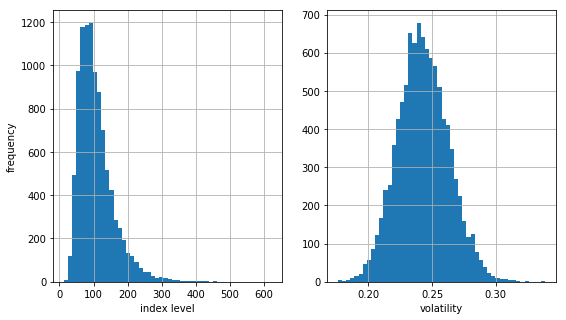

In [250]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)

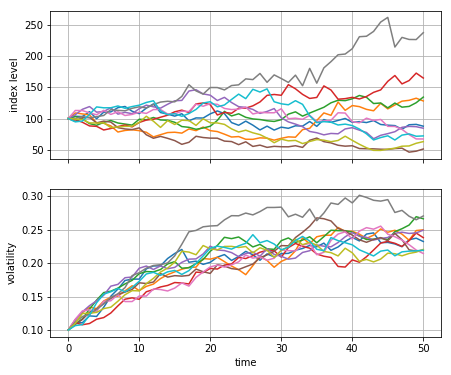

In [251]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax1.grid(True)
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

In [254]:
import scipy.stats as scs
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2 : ndarray objects
        results object from simulation
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print("%14s %14s %14s" % 
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print("%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0]))
    print("%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0]))
    print("%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1]))
    print("%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2]))
    print("%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print("%14s %14.3f %14.3f" % ('skew', sta1[4], sta2[4]))
    print("%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5]))

In [255]:


print_statistics(S[-1], v[-1])



     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         12.945          0.176
           max        621.513          0.339
          mean        107.587          0.243
           std         52.071          0.020
          skew          1.691          0.172
      kurtosis          5.521          0.097
